## Data Preprocessing and Diagnostics

### Importing necessary packages and library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline 

### Reading in JSON datasets

In [3]:
#  reading in the tracks.json to a pandas DataFrame
tracks_df = pd.read_json("data\\tracks.json")

#  reading in the audio_features.json to a pandas DataFrame
audio_features_df = pd.read_json("data\\audio_features.json")

In [4]:
#  display random data entries
tracks_df.sample(10)

,song_title,artist_name,album_title,release_date,duration,popularity,uri
130537,"Canta Canta, Minha Gente",Martinho Da Vila,Martinho da Vila,1974-03-30,153440,54,spotify:track:57E1ka54d8zrIy0VzE1EAV
109071,Heal the World,Michael Jackson,Dangerous,1991-11-13,384306,68,spotify:track:7woW97CfcWaKtuC6W5BP2K
64552,My Night Story,Vanessa Cino,My Night Story,2022-06-17,112709,58,spotify:track:2sDtiIjbQvJ0JP59zwPcnF
105678,Despina,Sanem Finley,Despina,2021-09-10,213250,63,spotify:track:7gakLWG0iQZ5lCwV3WzfNw
42377,The New Ground,Kristin Andreassen,Gondolier,2015-02-17,206826,30,spotify:track:6yljyecBkeP42NOhPzuJpH
117849,Farol,Maria Luiza Jobim,Farol,2021-02-25,145191,47,spotify:track:05kSoelsyqTfXeVV1xIXv4
96046,Sunroof,Nicky Youre,Sunroof,2021-12-03,163025,93,spotify:track:4h4QlmocP3IuwYEj2j14p8
32308,Strangers,Roosevelt,Polydans,2021-02-26,220726,57,spotify:track:6VS4OTcpylKl984tzFYC11
134657,Baixinha - Ao Vivo,Matheus & Kauan,Tem Moda Pra Tudo (Ao Vivo),2019-03-22,156704,46,spotify:track:3i4ssEZfLO3bgaB6hnj3tp
18586,Love You Now,Noah Guthrie,Love You Now,2017-02-10,223000,0,spotify:track:3iPCIGO1IEo5u0HYrnkhjD


In [5]:
#  display random data entries
audio_features_df.sample(10)

,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
20113,spotify:track:0kr6d8wHDQPlzuET33NVn6,0.499,0.720,8,-9.101,1,0.0286,0.00466,0.003030,0.1220,0.652,96.103,4
159922,spotify:track:1fRYJWQZw6IGZU6u3rpqBO,0.758,0.371,5,-5.736,0,0.0352,0.74300,0.000000,0.1750,0.646,95.994,4
7711,spotify:track:51T1wGHtx6hXW89UCzw1Rc,0.722,0.895,11,-3.684,0,0.1180,0.10100,0.000001,0.0695,0.963,143.383,4
92984,spotify:track:6Zu3SU3shAV8AtOsWV8A72,0.844,0.784,9,-4.908,1,0.0357,0.37700,0.000002,0.0288,0.975,105.546,4
19538,spotify:track:1KaYa7hb7zrCiMmQBIpLwL,0.570,0.297,0,-11.641,1,0.0348,0.61300,0.000000,0.2080,0.308,95.169,4
20245,spotify:track:6REPF37KwcWMqyk6XCuB7p,0.261,0.524,2,-6.697,1,0.0437,0.61200,0.000002,0.0923,0.119,58.883,3
85547,spotify:track:1HaiuKlLZqB1J1od7sqGhc,0.612,0.689,1,-9.040,0,0.0354,0.32600,0.098700,0.1070,0.200,91.990,4
14825,spotify:track:1VGacQwwIrLmqmvSbmQhpW,0.574,0.440,6,-9.917,0,0.0491,0.07350,0.000015,0.3240,0.562,168.677,4
88015,spotify:track:3Rc2ajBMInxeNGVkMPC92Y,0.678,0.871,6,-4.781,1,0.0342,0.05870,0.249000,0.0928,0.280,117.029,4
43215,spotify:track:4VNvzf9nHWAZBHAJxfzVcy,0.543,0.723,2,-5.889,1,0.0332,0.59400,0.003160,0.3140,0.496,112.061,4


### Validating data types

In [6]:
#  check dtypes of each column
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161056 entries, 0 to 161055
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   song_title    161056 non-null  object
 1   artist_name   161056 non-null  object
 2   album_title   161056 non-null  object
 3   release_date  160875 non-null  object
 4   duration      161056 non-null  int64 
 5   popularity    161056 non-null  int64 
 6   uri           161056 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.6+ MB


release_date column needs to be converted to datetime

In [7]:
#  check dtypes of each column
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160513 entries, 0 to 160512
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uri               160513 non-null  object 
 1   danceability      160513 non-null  float64
 2   energy            160513 non-null  float64
 3   key               160513 non-null  int64  
 4   loudness          160513 non-null  float64
 5   mode              160513 non-null  int64  
 6   speechiness       160513 non-null  float64
 7   acousticness      160513 non-null  float64
 8   instrumentalness  160513 non-null  float64
 9   liveness          160513 non-null  float64
 10  valence           160513 non-null  float64
 11  tempo             160513 non-null  float64
 12  time_signature    160513 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 15.9+ MB


### Checking missing/null values

<AxesSubplot: >

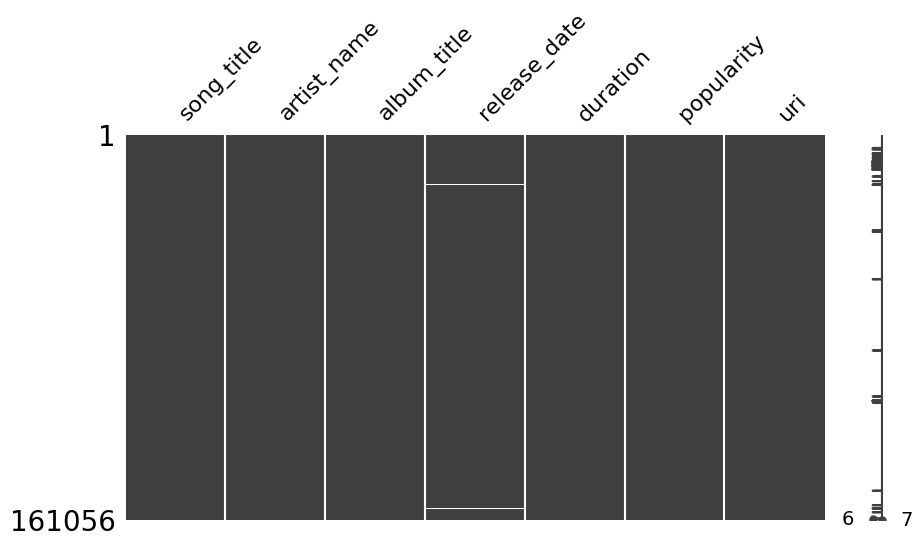

In [8]:
#  check if there are any null values
msno.matrix(tracks_df, figsize=(10,5))

In [9]:
#  display rows with missing release_date
missing_rows = tracks_df["release_date"].isnull()
tracks_df[missing_rows]

,song_title,artist_name,album_title,release_date,duration,popularity,uri
5443,In the Shadow of the Valley,,,None,187000,0,spotify:local:::In+the+Shadow+of+the+Valley:187
5844,April Sweatpants,,,None,166000,0,spotify:local:::April+Sweatpants:166
6002,Gee (Korean Ver. MP3 only),SNSD,,None,205000,0,spotify:local:SNSD::Gee+%28Korean+Ver.+MP3+onl...
6003,Hero,,,None,194000,0,spotify:local:::Hero:194
6008,Beneath the Mask [With Lyrics] - Persona 5,,,None,285000,0,spotify:local:::Beneath+the+Mask+%5BWith+Lyric...
...,...,...,...,...,...,...,...
160648,The Storms Are On the Ocean,The Walkabouts,Satisfied Mind,None,301000,0,spotify:local:The+Walkabouts:Satisfied+Mind:Th...
160649,Hurricane,Thinking Fellers Union Local 282,Admonishing the Bishops,None,374000,0,spotify:local:Thinking+Fellers+Union+Local+282...
160650,A Perfect Storm,UNKLE,End Titles...Redux,None,181000,0,spotify:local:UNKLE:End+Titles...Redux:A+Perfe...
160652,Stormy,The Meters,The Meters,None,220000,0,spotify:local:The+Meters:The+Meters:Stormy:220


There are null values in the release_date column: around <b>181</b> missing values.

<AxesSubplot: >

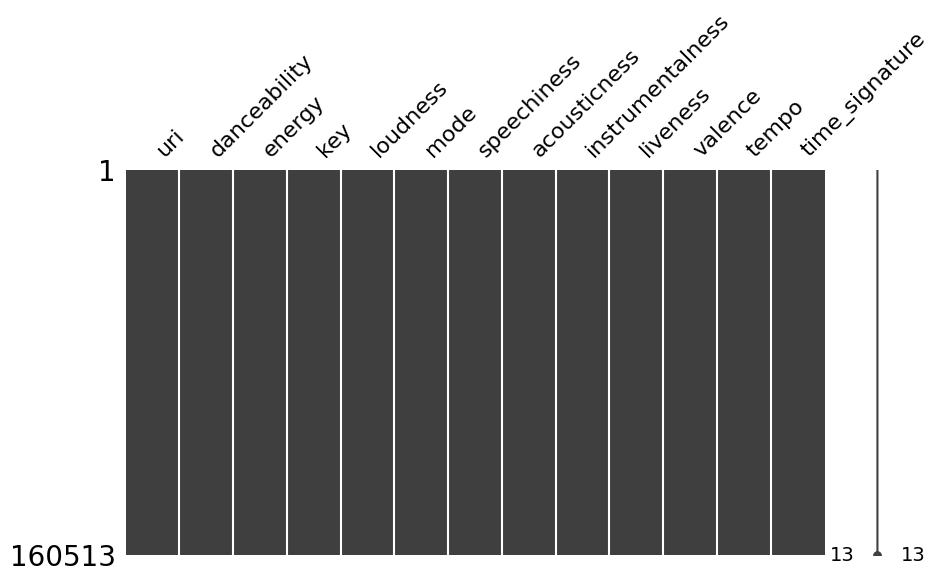

In [10]:
#  check if there are any null values
msno.matrix(audio_features_df, figsize=(10,5))

### Checking for duplicated values

In [11]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
tracks_duplicated = tracks_df.duplicated(subset=["uri"])
tracks_duplicated_num = tracks_duplicated.sum()
tracks_total = tracks_df.shape[0]
tracks_duplicated_percent = (tracks_duplicated_num / tracks_total) * 100
print(f"{tracks_duplicated_percent: .2f}% ({tracks_duplicated_num} of {tracks_total}) of the Tracks dataset are duplicated entries.")

#  display duplicated entries
tracks_df[tracks_duplicated]

 28.47% (45848 of 161056) of the Tracks dataset are duplicated entries.


,song_title,artist_name,album_title,release_date,duration,popularity,uri
1200,Have You Ever Seen The Rain,Creedence Clearwater Revival,Pendulum (Expanded Edition),1970-12-07,160133,84,spotify:track:2LawezPeJhN4AWuSB0GtAU
1330,Payphone - Edit,Maroon 5,Overexposed (Deluxe),2012-01-01,231373,48,spotify:track:5cy3CNTBZbX8vZUIsu4p7K
1380,She Will Be Loved - Radio Mix,Maroon 5,Songs About Jane: 10th Anniversary Edition,2002,259453,79,spotify:track:4llK75pXNWZz6KAho2Gp16
1544,Too Good At Goodbyes,Sam Smith,The Thrill Of It All (Special Edition),2017-11-03,201000,76,spotify:track:3VlbOrM6nYPprVvzBZllE5
1651,Take Back Home Girl (Feat. Tori Kelly),Chris Lane,Take Back Home,2017-12-08,211426,0,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN
...,...,...,...,...,...,...,...
161050,U Smile,Justin Bieber,My World 2.0,2010-01-01,196906,63,spotify:track:6Xw2FLih8m5ItDbyP992HH
161051,Born This Way,Lady Gaga,Born This Way,2011-01-01,260466,0,spotify:track:0FC7X3BRdEJC8L4ZEUAv2Q
161053,Walk,Foo Fighters,Wasting Light,2011-04-12,255960,71,spotify:track:76Je5Wklky23mVoxiRszcN
161054,Run the World (Girls),Beyoncé,4,2011-06-24,236093,37,spotify:track:7EdEUnekGCkChJzJyGp6TB


In [12]:
#  checking if there are duplicated entries
#  using URI column since it contains unique values
audiofeat_duplicated = audio_features_df.duplicated(subset=["uri"])
audiofeat_duplicated_num = audiofeat_duplicated.sum()
audiofeat_total = audio_features_df.shape[0]
audiofeat_duplicated_percent = (audiofeat_duplicated_num / audiofeat_total) * 100
print(f"{audiofeat_duplicated_percent: .2f}% ({audiofeat_duplicated_num} of {audiofeat_total}) of the audio features dataset are duplicated entries.")

#  display duplicated entries
audio_features_df[audiofeat_duplicated]

 28.51% (45766 of 160513) of the audio features dataset are duplicated entries.


,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1200,spotify:track:2LawezPeJhN4AWuSB0GtAU,0.741,0.697,0,-7.028,1,0.0277,0.066400,0.000023,0.1330,0.774,116.109,4
1330,spotify:track:5cy3CNTBZbX8vZUIsu4p7K,0.741,0.783,4,-4.791,1,0.0415,0.015000,0.000000,0.3020,0.534,110.002,4
1380,spotify:track:4llK75pXNWZz6KAho2Gp16,0.651,0.663,0,-5.569,0,0.0281,0.228000,0.000000,0.0994,0.465,102.000,4
1544,spotify:track:3VlbOrM6nYPprVvzBZllE5,0.681,0.372,5,-8.237,1,0.0432,0.640000,0.000000,0.1690,0.476,91.873,4
1651,spotify:track:4fv0mLkB3wY4Z2GAG1mWAN,0.494,0.796,11,-3.968,1,0.0738,0.381000,0.000000,0.0918,0.646,159.926,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160507,spotify:track:6Xw2FLih8m5ItDbyP992HH,0.705,0.590,1,-5.308,1,0.0284,0.504000,0.000000,0.1160,0.421,112.565,3
160508,spotify:track:0FC7X3BRdEJC8L4ZEUAv2Q,0.616,0.828,11,-4.736,1,0.1330,0.005780,0.000000,0.3520,0.576,123.986,4
160510,spotify:track:76Je5Wklky23mVoxiRszcN,0.234,0.865,9,-5.131,1,0.0516,0.000036,0.000532,0.2890,0.194,137.107,4
160511,spotify:track:7EdEUnekGCkChJzJyGp6TB,0.733,0.899,0,-4.237,1,0.1430,0.004960,0.000047,0.3720,0.760,127.086,4


## Data Cleaning
<ol>
<li>Convert release_date column to datetime</li>
<li>Drop entries with null values</li>
<li>Drop duplicated entries</li>

### Convert release_date column to datetime

In [13]:
#  converting dtype of column to its proper dtype
tracks_clean_df = tracks_df.copy()
tracks_clean_df["release_date"] = pd.to_datetime(tracks_clean_df.loc[:, "release_date"], errors="coerce")

#  verify what dtype the column is
tracks_clean_df.dtypes

song_title              object
artist_name             object
album_title             object
release_date    datetime64[ns]
duration                 int64
popularity               int64
uri                     object
dtype: object

### Drop entries with null values

<AxesSubplot: >

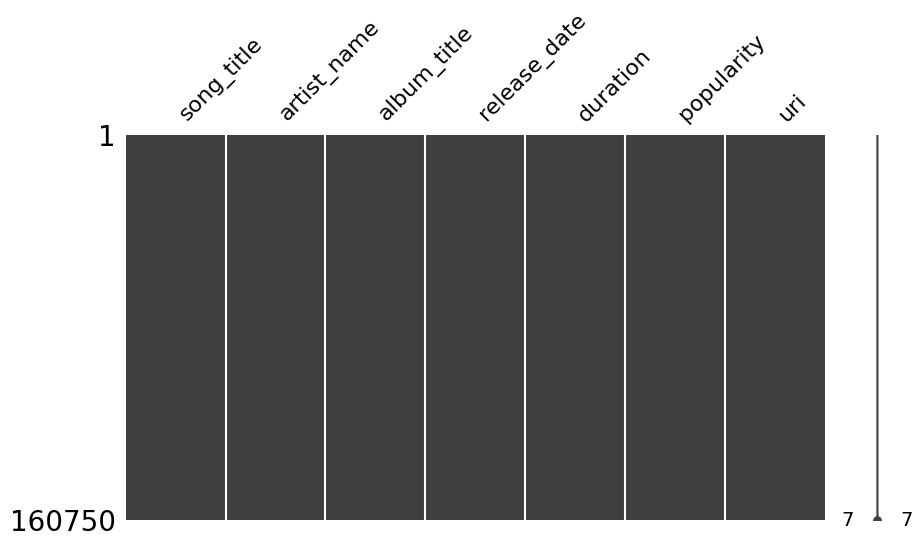

In [14]:
#  dropping rows with empty release dates
tracks_clean_df = tracks_clean_df.dropna(subset=["release_date"])

#  check if there are any null values
msno.matrix(tracks_clean_df, figsize=(10,5))

### Drop duplicated entries

In [15]:
#  dropping duplicate rows 
tracks_clean_df = tracks_clean_df.drop_duplicates(subset=["uri"])
tracks_clean_df

,song_title,artist_name,album_title,release_date,duration,popularity,uri
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,222026,57,spotify:track:3TjoLn6AliBGi3QbwwTxKp
1,comedy,Sion,love,2022-07-23,213275,48,spotify:track:1kNVRCfLtotmIKQOb87tUL
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,383066,44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,311100,34,spotify:track:3UG4sW8T05V7raSbLA67o8
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,181973,53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT
...,...,...,...,...,...,...,...
161040,Montezuma,Fleet Foxes,Helplessness Blues,2011-05-03,217120,0,spotify:track:6kzi5LTg5uECin8pC34nxV
161041,Eyes Be Closed,Washed Out,Within and Without,2011-07-12,287666,0,spotify:track:6eNYsU7sfgxQHTvILQxbce
161044,Boy With a Coin,Iron & Wine,The Shepherd's Dog,2007-09-25,245466,0,spotify:track:2ir2gcSm7S0H1Fa7oGKfLr
161045,The Light,The Album Leaf,Into The Blue Again,2006-11-08,269066,0,spotify:track:2JPF4tCg8thUuISn496ynn


In [16]:
#  dropping duplicate rows 
audiofeat_clean_df = audio_features_df.drop_duplicates(subset=["uri"])
audiofeat_clean_df

,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.312,0.399,2,-8.506,1,0.0321,0.47100,0.583000,0.1300,0.1440,126.025,4
1,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.841,0.367,5,-7.085,1,0.0635,0.86900,0.003400,0.1140,0.1840,110.046,4
2,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.438,0.156,2,-17.311,1,0.0302,0.88300,0.268000,0.1050,0.2220,85.344,4
3,spotify:track:3UG4sW8T05V7raSbLA67o8,0.622,0.730,1,-7.714,1,0.0368,0.01850,0.000426,0.1050,0.5380,117.036,4
4,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.417,0.123,6,-16.572,0,0.0377,0.99300,0.012500,0.1430,0.1800,137.444,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160497,spotify:track:6kzi5LTg5uECin8pC34nxV,0.314,0.308,0,-9.117,1,0.0283,0.85400,0.011700,0.0993,0.0947,99.214,4
160498,spotify:track:6eNYsU7sfgxQHTvILQxbce,0.207,0.878,4,-7.212,1,0.0449,0.00441,0.421000,0.3410,0.1380,89.969,4
160501,spotify:track:2ir2gcSm7S0H1Fa7oGKfLr,0.660,0.566,0,-8.255,1,0.0293,0.12300,0.795000,0.1220,0.2950,125.747,4
160502,spotify:track:2JPF4tCg8thUuISn496ynn,0.176,0.123,1,-16.596,1,0.0439,0.90800,0.879000,0.2080,0.0388,109.536,5


### Data validation

In [27]:
#  TODO: inspect album whether they are actually songs NOT podcast type
tracks_clean_df.album_title.value_counts().head(50)

Spotify Singles                                                                                            725
Spotify Sessions                                                                                           277
Greatest Hits                                                                                              270
Learn In Your Car: Verbs 101 French                                                                         86
The Complete Studio Albums                                                                                  81
Instant Karma: The Amnesty International Campaign To Save Darfur [The Complete Recordings] (Audio Only)     61
Silver & Gold                                                                                               60
Anthology 1                                                                                                 60
The Wall [2011 - Remaster] (2011 Remastered Version)                                                        55
G

## Data Exploration

### Merging the datasets

In [17]:
#  joining the two datasets with SQL inner join-like mechanism 
spotify_df = tracks_clean_df.join(audiofeat_clean_df, how="inner", lsuffix="", rsuffix="_duplicate")

#  dropping the duplicated key column 
spotify_df = spotify_df.drop(columns="uri_duplicate")

spotify_df.head()

,song_title,artist_name,album_title,release_date,duration,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Swan Upon Leda,Hozier,Swan Upon Leda,2022-10-07,222026,57,spotify:track:3TjoLn6AliBGi3QbwwTxKp,0.312,0.399,2,-8.506,1,0.0321,0.4710,0.583000,0.130,0.144,126.025,4
1,comedy,Sion,love,2022-07-23,213275,48,spotify:track:1kNVRCfLtotmIKQOb87tUL,0.841,0.367,5,-7.085,1,0.0635,0.8690,0.003400,0.114,0.184,110.046,4
2,The Breeze / My Baby Cries,Bill Callahan,Loving Takes This Course - a Tribute to the So...,2009-06-06,383066,44,spotify:track:32QtDJN4oRfo3Jwy6gpoWN,0.438,0.156,2,-17.311,1,0.0302,0.8830,0.268000,0.105,0.222,85.344,4
3,少し泣く,エルスウェア紀行,少し泣く,2021-10-27,311100,34,spotify:track:3UG4sW8T05V7raSbLA67o8,0.622,0.730,1,-7.714,1,0.0368,0.0185,0.000426,0.105,0.538,117.036,4
4,If I Didn't Care,The Ink Spots,The Anthology,1998-06-16,181973,53,spotify:track:2jPgfwVXOKnUl2QLQsnIAT,0.417,0.123,6,-16.572,0,0.0377,0.9930,0.012500,0.143,0.180,137.444,3
